# Note
1. Melakukan percobaan build_models v4.0
2. Dilakukan pada hari Kamis, 18 Juli 2024
3. Tempat di Kost
4. Data menggunakan Dataset yang dari Roboflow 
4. Meliputi Class: 20 Kelas Aksara Jawa:
- Ba, Ca, Da, Dha, Ga, Ha, Ja, Ka, La, Ma, 
- Na, Nga, Nya, Pa, Ra, Sa, Ta, Tha, Wa, Ya

# Setup Environment 

In [31]:
# pip install tensorflow

In [32]:
# pip install keras

In [33]:
# pip install opencv-python

In [34]:
# pip install imutils

In [35]:
# pip install matplotlib

In [36]:
# pip install seaborn

In [37]:
# pip install scikit-learn

# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt  
import os
from os.path import join
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization , Activation,Conv2D
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score,roc_curve,confusion_matrix 

# Preprocessing

In [2]:
import os
import pandas as pd
import cv2

def convert_to_png(image_path, output_path):
    # Read the image using OpenCV
    image = cv2.imread(image_path)
    # Create the output directory if it doesn't exist
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    # Save the image as PNG
    cv2.imwrite(output_path, image)

def get_last_n_parts(path, n):
    return os.path.join(*path.split(os.sep)[-n:])

def create_labels_csv(DATASET_PATH, OUTPUT_CSV, OUTPUT_IMAGE_DIR):
    # List to store image file paths and their corresponding labels and dimensions
    data = []

    # Traverse the dataset directory
    for root, dirs, files in os.walk(DATASET_PATH):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')):
                # Get the class label from the subdirectory name
                label = os.path.basename(root)
                # Get the full file path
                file_path = os.path.join(root, file)
                
                # Create a new file path for the PNG image
                relative_path = os.path.relpath(file_path, DATASET_PATH)
                png_file_path = os.path.join(OUTPUT_IMAGE_DIR, os.path.splitext(relative_path)[0] + '.png')
                
                # Convert the image to PNG
                convert_to_png(file_path, png_file_path)
                
                # Get image dimensions
                img = cv2.imread(file_path)
                height, width, _ = img.shape
                
                # Get only the last 3 parts of the path for CSV
                csv_path = get_last_n_parts(png_file_path, 2)
                
                # Append to the data list including dimensions
                data.append([csv_path, width, height, label])
    
    # Create a DataFrame from the data list
    df = pd.DataFrame(data, columns=['file_path', 'width', 'height', 'label'])
    
    # Save the DataFrame to a CSV file
    df.to_csv(OUTPUT_CSV, index=False)
    print(f'Labels CSV file created at: {OUTPUT_CSV}')

# Define the paths for the two datasets and their respective output directories
DATASET_PATH = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_original\\CustomData\\v.7_all_data_custom\\"
OUTPUT_CSV = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.4_data_custom\\labels.csv"
OUTPUT_IMAGE_DIR = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.4_data_custom\\"

# Process the first dataset
create_labels_csv(DATASET_PATH, OUTPUT_CSV, OUTPUT_IMAGE_DIR)

Labels CSV file created at: C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v3.4_data_custom\labels.csv


In [3]:
import pandas as pd

# Path ke dua file CSV yang berbeda
path_main = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.4_data_custom\\"
file = path_main + "labels.csv"
df = pd.read_csv(file)
df.head()

,file_path,width,height,label
0,ba\002798ad-631c-4f0c-b899-aa66fb5c2ac1.png,239,167,ba
1,ba\040ab1c7-bffa-4a93-8c42-54e5597f2243.png,96,67,ba
2,ba\0789a0d8-e129-48ec-b74e-2e53f4a7ece9.png,235,166,ba
3,ba\11f6c317-635a-4e64-8552-05bf8b7b3a95.png,96,67,ba
4,ba\13469389-6f9b-43dc-be99-8dfbfaae51cb.png,235,165,ba


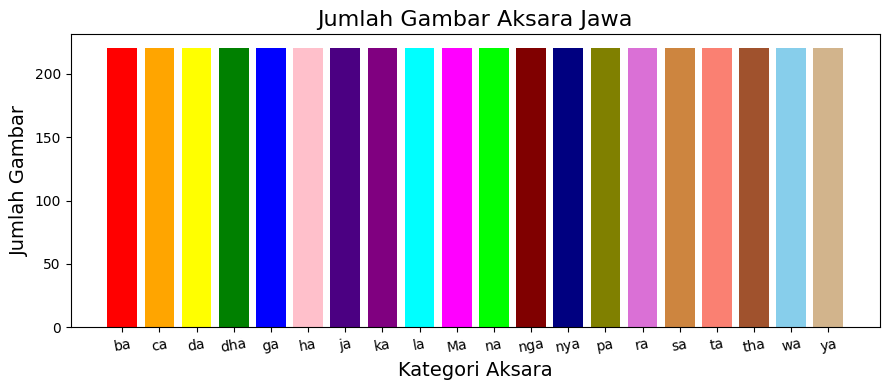

In [4]:
import matplotlib.pyplot as plt
import os

# Define function to count files in each directory
def count_files(link):
    path = link
    num_files = len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])
    return num_files

# Define paths for two sources
source_paths = [
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.4_data_custom\\ba",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.4_data_custom\\ca",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.4_data_custom\\da",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.4_data_custom\\dha",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.4_data_custom\\ga",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.4_data_custom\\ha",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.4_data_custom\\ja",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.4_data_custom\\ka",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.4_data_custom\\la",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.4_data_custom\\ma",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.4_data_custom\\na",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.4_data_custom\\nga",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.4_data_custom\\nya",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.4_data_custom\\pa",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.4_data_custom\\ra",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.4_data_custom\\sa",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.4_data_custom\\ta",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.4_data_custom\\tha",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.4_data_custom\\wa",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.4_data_custom\\ya"
]

# Count files for each path
file_counts = [count_files(path) for path in source_paths]

# Define the input path aksara
aksara_categories = ['ba', 'ca', 'da', 'dha', 'ga', 'ha', 'ja', 'ka', 'la', 'Ma', 'na',
                     'nga', 'nya', 'pa', 'ra', 'sa', 'ta', 'tha', 'wa', 'ya']

colors = ['red', 'orange', 'yellow', 'green', 'blue', 'pink', 'indigo', 'purple', 
          'cyan', 'magenta', 'lime', 'maroon', 'navy', 'olive', 'orchid', 'peru', 
          'salmon', 'sienna', 'skyblue', 'tan']  # Colors for each bar

# Create bar chart
plt.figure(figsize=(9, 4))
plt.bar(aksara_categories, file_counts, color=colors)
plt.xlabel('Kategori Aksara', fontsize=14)
plt.ylabel('Jumlah Gambar', fontsize=14)
plt.title('Jumlah Gambar Aksara Jawa', fontsize=16)
plt.xticks(fontsize=10, rotation=10)
plt.tight_layout()

# Show the plot
plt.show()

In [7]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Define the input path and aksaraJowo
INPUT_PATH = path_main  
AKSARA = aksara_categories

# Define the target image size
IMAGE_SIZE = (64, 64)
INPUT_SHAPE = (64, 64, 1)

def create_image_generator(input_path, aksaraJowo, image_size):
    for index, jowo in enumerate(aksaraJowo):
        aksara_path = os.path.join(input_path, jowo)
        
        for filename in os.listdir(aksara_path):
            image_path = os.path.join(aksara_path, filename)
            original_image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)  # Baca dan ubah warna asli
            original_image_resized = cv2.resize(original_image, image_size, interpolation=cv2.INTER_AREA)  # Resize gambar asli
            grayscale_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Baca gambar sebagai grayscale
            grayscale_image_resized = cv2.resize(grayscale_image, image_size, interpolation=cv2.INTER_AREA)  # Resize gambar grayscale
            image_filtered = apply_custom_preprocessing(grayscale_image_resized)
            
            yield original_image_resized, grayscale_image_resized, image_filtered, index


def load_images(input_path, aksaraJowo, image_size):
    X_original, X_grayscale, X_filtered, y_label = [], [], [], []
    
    for original_image, grayscale_image, image_filtered, label in create_image_generator(input_path, aksaraJowo, image_size):
        X_original.append(original_image)
        X_grayscale.append(grayscale_image)
        X_filtered.append(image_filtered)
        y_label.append(label)
        
    X_original = np.array(X_original)
    X_grayscale = np.array(X_grayscale)
    X_filtered = np.array(X_filtered)
    y_label = to_categorical(np.array(y_label))
    
    return X_original, X_grayscale, X_filtered, y_label

def apply_custom_preprocessing(image):
    # Apply Gaussian Blur
    ApplyGaussian = cv2.GaussianBlur(image, (9, 9), 10.0)
    # Enhance the image sharpness
    img = cv2.addWeighted(image, 1.5, ApplyGaussian, -0.5, 0, image)
    # Apply sharpening filter
    kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    img = cv2.filter2D(img, -1, kernel)
    # Remove noise using median filter
    img = cv2.medianBlur(img, 1)
    # Apply Otsu's thresholding
    _, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Invert the image (background to black, text to white)
    img = 255 - img
    
    return img

# Load images with custom preprocessing applied
X_original, X_grayscale, X_filtered, y_label = load_images(INPUT_PATH, AKSARA, IMAGE_SIZE)

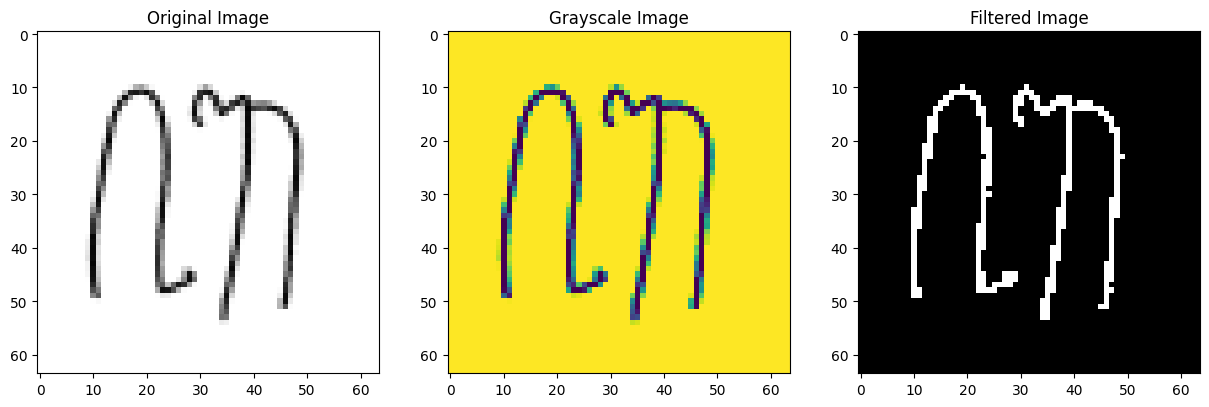

In [8]:
# Select one image to display
index_to_display = 100

# Display the original image, grayscale image, and filtered image
original_image = X_original[index_to_display]
grayscale_image = X_grayscale[index_to_display]
filtered_image = X_filtered[index_to_display]

# Plot the images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(original_image)
plt.axis('on')

plt.subplot(1, 3, 2)
plt.title('Grayscale Image')
plt.imshow(grayscale_image)
plt.axis('on')

plt.subplot(1, 3, 3)
plt.title('Filtered Image')
# plt.imshow(filtered_image, cmap='gray')
plt.imshow(filtered_image, cmap='gray')
plt.axis('on')

plt.show()

In [9]:
# Reshape X_filtered
X_filtered_reshaped = X_filtered.reshape(-1, 64, 64, 1).astype("float32") / 255  # Reshape dan normalisasi
# X_filtered_reshaped = X_filtered.reshape(-1, 112, 112, 1)

print("X_filtered shape after reshape:", X_filtered_reshaped.shape)

X_filtered shape after reshape: (4400, 64, 64, 1)


In [10]:
from sklearn.model_selection import train_test_split

# Tahap pertama: Membagi data menjadi data pelatihan (80%) dan data sementara (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X_filtered_reshaped, y_label, test_size=0.2, random_state=45)

# Tahap kedua: Membagi data sementara menjadi data validasi (10%) dan data pengujian (10%)
# Data sementara adalah 20% dari total data, jadi 10% / 20% = 0.5 dari data sementara untuk validasi
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=37)

# Verifikasi ukuran data
print("Ukuran data pelatihan:", X_train.shape, y_train.shape)
print("Ukuran data validasi:", X_val.shape, y_val.shape)
print("Ukuran data pengujian:", X_test.shape, y_test.shape)

Ukuran data pelatihan: (3520, 64, 64, 1) (3520, 20)
Ukuran data validasi: (440, 64, 64, 1) (440, 20)
Ukuran data pengujian: (440, 64, 64, 1) (440, 20)


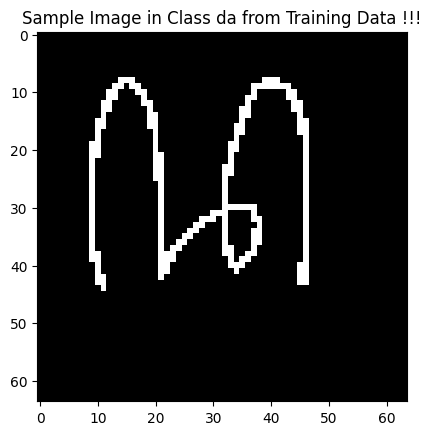

In [11]:
# Menampilkan salah satu gambar dari data pelatihan
plt.imshow(X_train[0], cmap='gray')
plt.title("Sample Image in Class {} from Training Data !!!".format(AKSARA[np.argmax(y_train[0])]))
plt.axis('on')
plt.show()

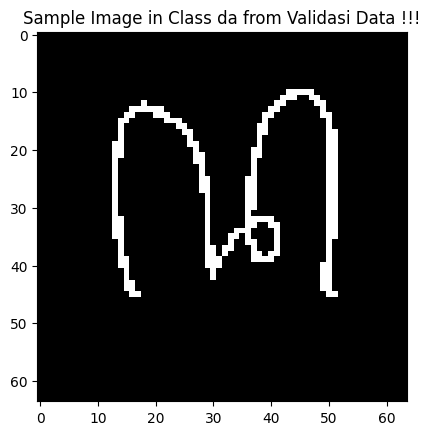

In [12]:
# Menampilkan salah satu gambar dari data validasi
plt.imshow(X_val[400], cmap='gray')
plt.title("Sample Image in Class {} from Validasi Data !!!".format(AKSARA[np.argmax(y_val[400])]))
plt.axis('on')
plt.show()

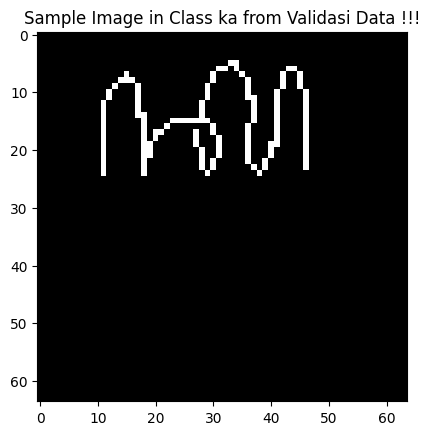

In [13]:
# Menampilkan salah satu gambar dari data pelatihan
plt.imshow(X_test[360], cmap='gray')
plt.title("Sample Image in Class {} from Validasi Data !!!".format(AKSARA[np.argmax(y_test[360])]))
plt.axis('on')
plt.show()

# Build the Model

## Model 1

In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.layers import BatchNormalization

# Set hyperparameters
optimizer = 'SGD'
learning_rate = 0.001
dropout_rate = 0.3
weight_decay = 0.0001
momentum = 0.09
clip_norm = 0.0
classes = 20
input_shape = INPUT_SHAPE

def inception_module(x, filters):
    f1, f3_r, f3, f5_r, f5, f_pool = filters

    path1 = layers.Conv2D(f1, (1, 1), padding='same')(x)
    path1 = BatchNormalization()(path1)
    path1 = layers.Activation('relu')(path1)

    path2 = layers.Conv2D(f3_r, (1, 1), padding='same')(x)
    path2 = BatchNormalization()(path2)
    path2 = layers.Activation('relu')(path2)
    path2 = layers.Conv2D(f3, (3, 3), padding='same')(path2)
    path2 = BatchNormalization()(path2)
    path2 = layers.Activation('relu')(path2)

    path3 = layers.Conv2D(f5_r, (1, 1), padding='same')(x)
    path3 = BatchNormalization()(path3)
    path3 = layers.Activation('relu')(path3)
    path3 = layers.Conv2D(f5, (5, 5), padding='same')(path3)
    path3 = BatchNormalization()(path3)
    path3 = layers.Activation('relu')(path3)

    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(f_pool, (1, 1), padding='same')(path4)
    path4 = BatchNormalization()(path4)
    path4 = layers.Activation('relu')(path4)

    return layers.concatenate([path1, path2, path3, path4], axis=-1)

def reduction_module(x, k, l, m, n):
    path1 = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    path2 = layers.Conv2D(n, (3, 3), strides=(2, 2), padding='same')(x)
    path2 = BatchNormalization()(path2)
    path2 = layers.Activation('relu')(path2)

    path3 = layers.Conv2D(k, (1, 1), padding='same')(x)
    path3 = BatchNormalization()(path3)
    path3 = layers.Activation('relu')(path3)
    path3 = layers.Conv2D(l, (3, 3), padding='same')(path3)
    path3 = BatchNormalization()(path3)
    path3 = layers.Activation('relu')(path3)
    path3 = layers.Conv2D(m, (3, 3), strides=(2, 2), padding='same')(path3)
    path3 = BatchNormalization()(path3)
    path3 = layers.Activation('relu')(path3)

    return layers.concatenate([path1, path2, path3], axis=-1)

def inception_v3(input_shape, classes, optimizer, learning_rate, dropout_rate, weight_decay, momentum, clip_norm):
    inputs = layers.Input(shape=input_shape)

    # Initial layers
    x = layers.Conv2D(32, (3, 3), strides=(2, 2), padding='valid')(inputs)
    x = BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(32, (3, 3), padding='valid')(x)
    x = BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    
    x = layers.Conv2D(80, (1, 1), padding='valid')(x)
    x = BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(192, (3, 3), padding='valid')(x)
    x = BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Inception modules
    x = inception_module(x, (64, 48, 64, 64, 96, 32))
    x = inception_module(x, (64, 48, 64, 64, 96, 64))
    x = inception_module(x, (64, 48, 64, 64, 96, 64))

    # Reduction module
    x = reduction_module(x, 64, 96, 96, 384)
    
    # Inception modules
    x = inception_module(x, (192, 128, 192, 128, 192, 192))
    x = inception_module(x, (192, 160, 192, 160, 192, 192))
    x = inception_module(x, (192, 160, 192, 160, 192, 192))
    x = inception_module(x, (192, 192, 192, 192, 192, 192))

    # Reduction module
    x = reduction_module(x, 192, 320, 320, 640)

    # Inception modules
    x = inception_module(x, (320, 384, 384, 448, 448, 192))
    x = inception_module(x, (320, 384, 384, 448, 448, 192))

    # Final layers
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(dropout_rate)(x)
    outputs = layers.Dense(classes, activation='softmax')(x)

    # Define optimizer with hyperparameters
    if optimizer == 'SGD':
        optimizer = optimizers.SGD(learning_rate=learning_rate, decay=weight_decay, momentum=momentum, clipnorm=clip_norm)
    elif optimizer == 'Adam':
        optimizer = optimizers.Adam(learning_rate=learning_rate, decay=weight_decay, momentum=momentum, clipnorm=clip_norm)
    elif optimizer == 'RMSprop':
        optimizer = optimizers.RMSprop(learning_rate=learning_rate, decay=weight_decay, momentum=momentum, clipnorm=clip_norm)
    else:
        raise ValueError("Optimizer not supported. Choose from 'SGD', 'Adam', or 'RMSprop'.")

    model = models.Model(inputs, outputs)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Build model
model = inception_v3(input_shape=input_shape, classes=classes, optimizer=optimizer, learning_rate=learning_rate, 
                     dropout_rate=dropout_rate, weight_decay=weight_decay, momentum=momentum, clip_norm=clip_norm)
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 64, 64, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_134 (Conv2D) │ (None, 31, 31,    │        320 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 31, 31,    │        128 │ conv2d_134[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_134      │ (None, 31, 31,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_135 (Conv2D) │ (None, 29, 29,    │      9,248 │ activation_134[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 29, 29,    │        128 │ conv2d_135[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_135      │ (None, 29, 29,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_136 (Conv2D) │ (None, 29, 29,    │     18,496 │ activation_135[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 29, 29,    │        256 │ conv2d_136[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_136      │ (None, 29, 29,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_26    │ (None, 15, 15,    │          0 │ activation_136[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_137 (Conv2D) │ (None, 15, 15,    │      5,200 │ max_pooling2d_26… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 15, 15,    │        320 │ conv2d_137[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_137      │ (None, 15, 15,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_138 (Conv2D) │ (None, 13, 13,    │    138,432 │ activation_137[0… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 13, 13,    │        768 │ conv2d_138[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_138      │ (None, 13, 13,    │          0 │ batch_normalizat

 Total params: 31,330,836 (119.52 MB)

 Trainable params: 31,306,068 (119.42 MB)

 Non-trainable params: 24,768 (96.75 KB)

In [21]:
import pandas as pd
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau

# Callback for logging to CSV
class CSVLogger(Callback):
    def __init__(self, filename):
        super(CSVLogger, self).__init__()
        self.filename = filename
        self.epoch = 1  # Mulai dari epoch 1

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['epoch'] = self.epoch
        self.epoch += 1
        df = pd.DataFrame([logs])
        if epoch == 0:
            df.to_csv(self.filename, mode='w', index=False)
        else:
            df.to_csv(self.filename, mode='a', header=False, index=False)

In [22]:
# Function to get the last epoch from CSV
def get_last_epoch(filename):
    try:
        df = pd.read_csv(filename)
        last_epoch = df['epoch'].max()
        return last_epoch
    except FileNotFoundError:
        return 0

# Define callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=55, min_lr=1e-3)

# Initialize callbacks
csv_logger = CSVLogger("C:\\Users\\wawn1\\projects_skripsi\\save_models\\save_models_csv\\training_log_v4.2.9_model1.csv")

In [23]:
# Train the model and save the logs to CSV
hist_v1 = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=64,
    callbacks=[
        reduce_lr,
        csv_logger
    ]
)

Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 393s 6s/step - accuracy: 0.0531 - loss: 3.2739 - val_accuracy: 0.0500 - val_loss: 3.0049 - learning_rate: 0.0010 - epoch: 1.0000
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 278s 5s/step - accuracy: 0.0630 - loss: 3.1360 - val_accuracy: 0.0500 - val_loss: 3.0203 - learning_rate: 0.0010 - epoch: 2.0000
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 336s 5s/step - accuracy: 0.0698 - loss: 3.1294 - val_accuracy: 0.0455 - val_loss: 3.0202 - learning_rate: 0.0010 - epoch: 3.0000
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 325s 5s/step - accuracy: 0.0761 - loss: 3.0803 - val_accuracy: 0.0500 - val_loss: 3.0218 - learning_rate: 0.0010 - epoch: 4.0000
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 307s 5s/step - accuracy: 0.0809 - loss: 3.0596 - val_accuracy: 0.0568 - val_loss: 3.0453 - learning_rate: 0.0010 - epoch: 5.0000
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 319s 5s/step - accuracy: 0.0966 - loss: 2.9695 - val_accuracy: 0.0591 - val_loss: 3.0602 - learning_rate: 0.0010 - epoch: 6.000

In [35]:
# # Get the last epoch from CSV
# last_epoch = get_last_epoch("C:\\Users\\wawn1\\projects_skripsi\\save_models\\save_models_csv\\training_log_")

# # Train the model from the last epoch
# hist_v12 = model.fit(
#     X_train, y_train,
#     validation_data=(X_val, y_val),
#     epochs=5, 
#     initial_epoch=last_epoch, 
#     batch_size=64,
#     callbacks=[
#         reduce_lr,
#         csv_logger
#     ]
# )

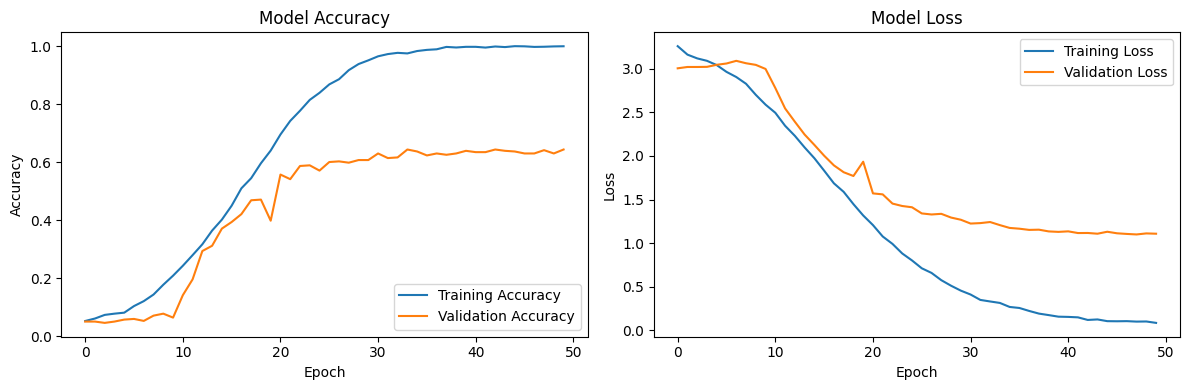

In [24]:
import matplotlib.pyplot as plt

# Memastikan bahwa history_v1.history memiliki data yang diperlukan
acc = hist_v1.history.get('accuracy', [])
test_acc = hist_v1.history.get('val_accuracy', [])
loss = hist_v1.history.get('loss', [])
test_loss = hist_v1.history.get('val_loss', [])

# Menentukan range epochs berdasarkan panjang data akurasi
epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

# Plot Training and Testing Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, test_acc, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot Training and Testing Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, test_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Mengatur layout agar rapi
plt.tight_layout()
plt.show()

In [25]:
from tensorflow.keras.models import load_model

save_model = "C:\\Users\\wawn1\\projects_skripsi\\save_models\\v4.2.8_model1.keras"
model.save(save_model)

# Load model yang telah disimpan
new_model = load_model(save_model)

# Evaluate the restored model on the test set
test_loss, test_acc = new_model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 406ms/step - accuracy: 0.7096 - loss: 0.9863
Test Loss: 1.036407470703125, Test Accuracy: 0.706818163394928


In [26]:
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, average_precision_score, precision_recall_curve, cohen_kappa_score, top_k_accuracy_score
from itertools import cycle

# Prediksi menggunakan model pada data uji
y_pred = model.predict(X_test)
y_pred_probabilities = tf.nn.softmax(y_pred).numpy()  # Terapkan softmax jika belum diterapkan di model
y_pred_classes = np.argmax(y_pred_probabilities, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Hitung metrik evaluasi
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
log_loss_value = log_loss(y_true_classes, y_pred_probabilities)
accuracy = accuracy_score(y_true_classes, y_pred_classes)
kappa = cohen_kappa_score(y_true_classes, y_pred_classes)
top_k_acc = top_k_accuracy_score(y_true_classes, y_pred_probabilities, k=5)
average_precision = np.mean([average_precision_score(y_test[:, i], y_pred_probabilities[:, i]) for i in range(len(AKSARA))])

# Print metrik evaluasi
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Log Loss: {log_loss_value:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Cohen's Kappa: {kappa:.4f}")
print(f"Top-5 Accuracy: {top_k_acc:.4f}")
print(f"Mean Average Precision (mAP): {average_precision:.4f}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 688ms/step
Precision: 0.7187
Recall: 0.7068
F1 Score: 0.7072
Log Loss: 2.5081
Accuracy: 0.7068
Cohen's Kappa: 0.6912
Top-5 Accuracy: 0.9227
Mean Average Precision (mAP): 0.7789


              precision    recall  f1-score   support

          ba       0.72      0.72      0.72        18
          ca       0.68      0.65      0.67        23
          da       0.74      0.70      0.72        20
         dha       0.67      0.69      0.68        26
          ga       0.83      0.65      0.73        23
          ha       0.59      0.64      0.62        25
          ja       0.84      0.91      0.88        23
          ka       0.74      0.71      0.72        24
          la       0.79      0.56      0.65        27
          Ma       0.67      0.63      0.65        19
          na       0.48      0.79      0.60        19
         nga       0.71      0.62      0.67        24
         nya       0.83      0.88      0.86        17
          pa       0.48      0.77      0.59        13
          ra       0.92      1.00      0.96        23
          sa       0.73      0.59      0.65        27
          ta       0.75      0.79      0.77        19
         tha       0.76    

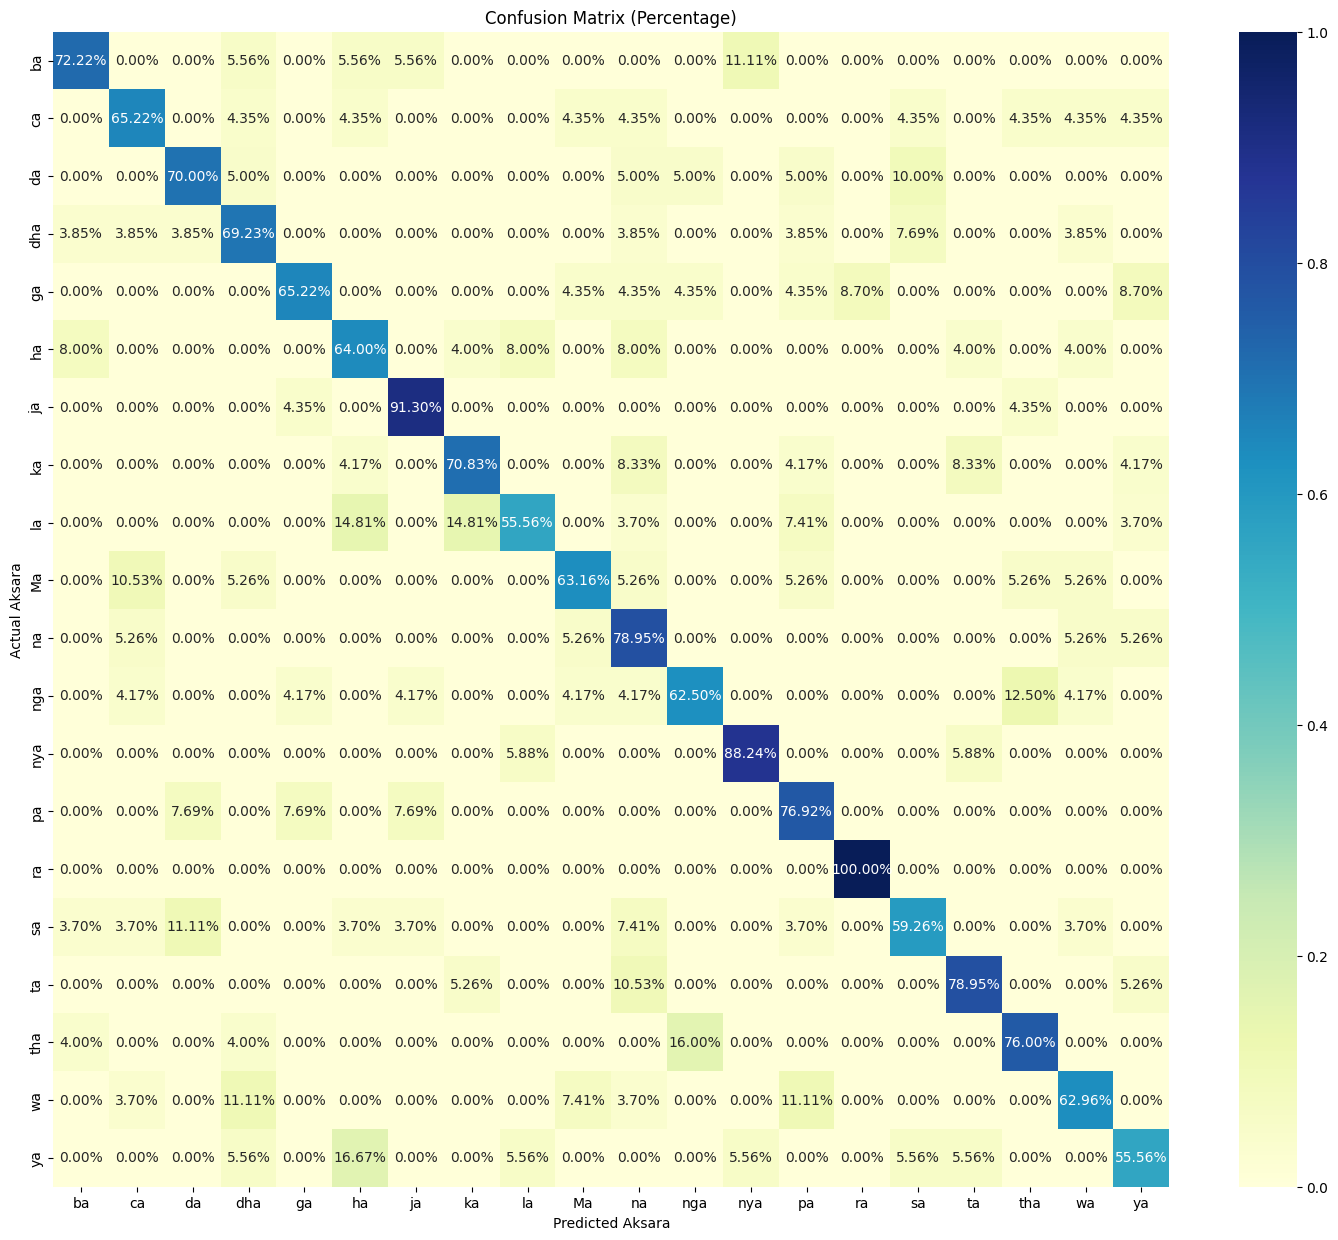

In [27]:
# Tampilkan classification report yang lengkap
report = classification_report(y_true_classes, y_pred_classes, target_names=AKSARA)
print(report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Normalisasi confusion matrix untuk mendapatkan persentase
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Tampilkan confusion matrix sebagai heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2%", cmap="YlGnBu", xticklabels=AKSARA, yticklabels=AKSARA)
plt.xlabel("Predicted Aksara")
plt.ylabel("Actual Aksara")
plt.title("Confusion Matrix (Percentage)")
plt.show()

AUC-ROC for class ba: 0.9377
AUC-ROC for class ca: 0.9641
AUC-ROC for class da: 0.9527
AUC-ROC for class dha: 0.9567
AUC-ROC for class ga: 0.9391
AUC-ROC for class ha: 0.9497
AUC-ROC for class ja: 0.9962
AUC-ROC for class ka: 0.9785
AUC-ROC for class la: 0.9436
AUC-ROC for class Ma: 0.9710
AUC-ROC for class na: 0.9629
AUC-ROC for class nga: 0.9797
AUC-ROC for class nya: 0.9904
AUC-ROC for class pa: 0.9469
AUC-ROC for class ra: 0.9992
AUC-ROC for class sa: 0.9654
AUC-ROC for class ta: 0.9527
AUC-ROC for class tha: 0.9844
AUC-ROC for class wa: 0.9601
AUC-ROC for class ya: 0.9670


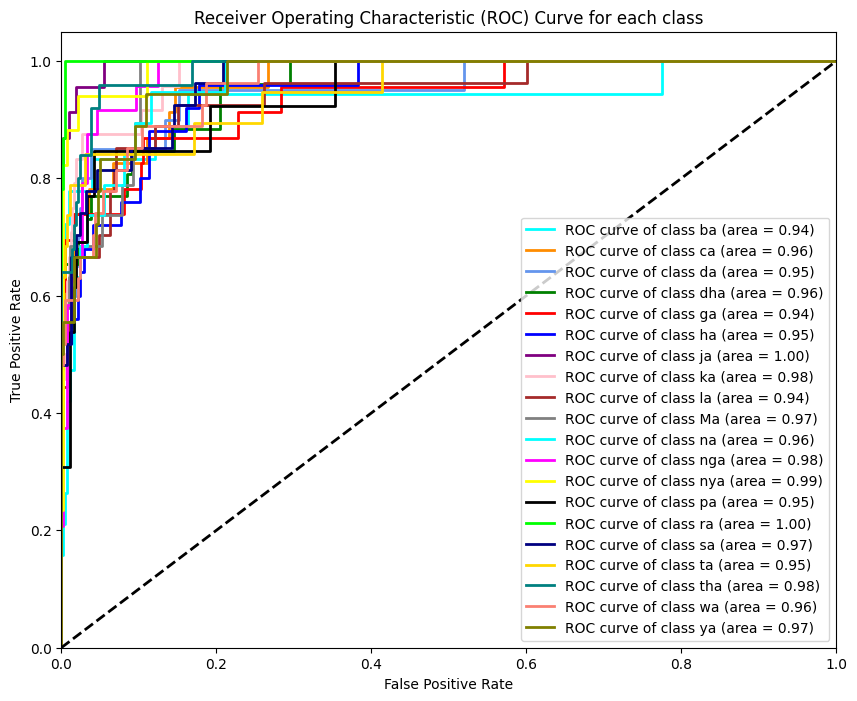

In [28]:
# Hitung AUC-ROC untuk setiap kelas
auc_roc_scores = roc_auc_score(y_test, y_pred_probabilities, average=None)
for idx, score in enumerate(auc_roc_scores):
    print(f"AUC-ROC for class {AKSARA[idx]}: {score:.4f}")

# Tampilkan ROC Curve untuk setiap kelas
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(AKSARA)
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'blue', 'purple', 'pink', 'brown', 'grey', 
                'cyan', 'magenta', 'yellow', 'black', 'lime', 'navy', 'gold', 'teal', 'salmon', 'olive'])

plt.figure(figsize=(10, 8))

for i, color in zip(range(n_classes), colors):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_probabilities[:, i])
    roc_auc[i] = roc_auc_score(y_test[:, i], y_pred_probabilities[:, i])
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve of class {AKSARA[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc="lower right")
plt.show()

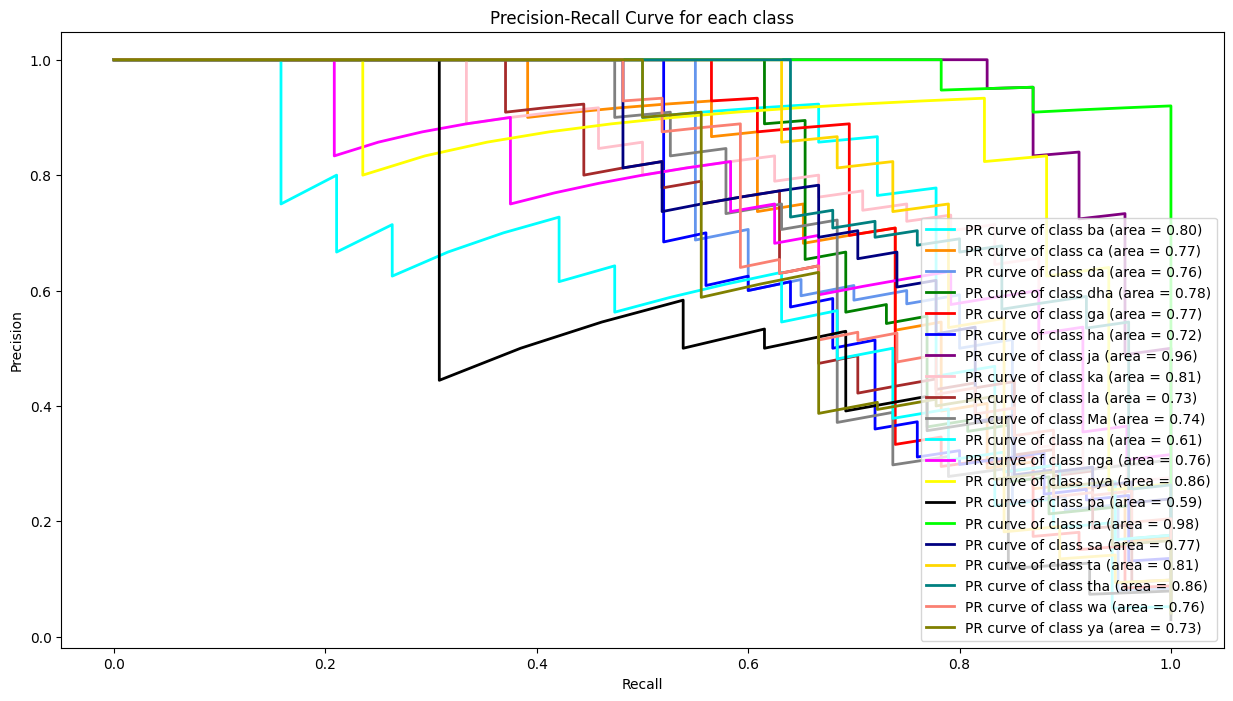

In [29]:
# Hitung AUPRC untuk setiap kelas
average_precision = dict()
precision_recall_curves = dict()

plt.figure(figsize=(15, 8))

for i, color in zip(range(n_classes), colors):
    precision_recall_curves[i], recall, _ = precision_recall_curve(y_test[:, i], y_pred_probabilities[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_pred_probabilities[:, i])
    plt.plot(recall, precision_recall_curves[i], color=color, lw=2, label=f'PR curve of class {AKSARA[i]} (area = {average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for each class')
plt.legend(loc="lower right")
plt.show()

## Model 2

In [30]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.layers import BatchNormalization

# Set hyperparameters
optimizer = 'SGD'
learning_rate = 0.00001
dropout_rate = 0.3
weight_decay = 0.0001
momentum = 0.9
clip_norm = 0.0
classes = 20
input_shape = INPUT_SHAPE

def inception_module(x, filters):
    f1, f3_r, f3, f5_r, f5, f_pool = filters

    path1 = layers.Conv2D(f1, (1, 1), padding='same')(x)
    path1 = BatchNormalization()(path1)
    path1 = layers.Activation('relu')(path1)

    path2 = layers.Conv2D(f3_r, (1, 1), padding='same')(x)
    path2 = BatchNormalization()(path2)
    path2 = layers.Activation('relu')(path2)
    path2 = layers.Conv2D(f3, (3, 3), padding='same')(path2)
    path2 = BatchNormalization()(path2)
    path2 = layers.Activation('relu')(path2)

    path3 = layers.Conv2D(f5_r, (1, 1), padding='same')(x)
    path3 = BatchNormalization()(path3)
    path3 = layers.Activation('relu')(path3)
    path3 = layers.Conv2D(f5, (5, 5), padding='same')(path3)
    path3 = BatchNormalization()(path3)
    path3 = layers.Activation('relu')(path3)

    path4 = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    path4 = layers.Conv2D(f_pool, (1, 1), padding='same')(path4)
    path4 = BatchNormalization()(path4)
    path4 = layers.Activation('relu')(path4)

    return layers.concatenate([path1, path2, path3, path4], axis=-1)

def reduction_module(x, k, l, m, n):
    path1 = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    path2 = layers.Conv2D(n, (3, 3), strides=(2, 2), padding='same')(x)
    path2 = BatchNormalization()(path2)
    path2 = layers.Activation('relu')(path2)

    path3 = layers.Conv2D(k, (1, 1), padding='same')(x)
    path3 = BatchNormalization()(path3)
    path3 = layers.Activation('relu')(path3)
    path3 = layers.Conv2D(l, (3, 3), padding='same')(path3)
    path3 = BatchNormalization()(path3)
    path3 = layers.Activation('relu')(path3)
    path3 = layers.Conv2D(m, (3, 3), strides=(2, 2), padding='same')(path3)
    path3 = BatchNormalization()(path3)
    path3 = layers.Activation('relu')(path3)

    return layers.concatenate([path1, path2, path3], axis=-1)

def inception_v3(input_shape, classes, optimizer, learning_rate, dropout_rate, weight_decay, momentum, clip_norm):
    inputs = layers.Input(shape=input_shape)

    # Initial layers
    x = layers.Conv2D(32, (3, 3), strides=(2, 2), padding='valid')(inputs)
    x = BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(32, (3, 3), padding='valid')(x)
    x = BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    
    x = layers.Conv2D(80, (1, 1), padding='valid')(x)
    x = BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(192, (3, 3), padding='valid')(x)
    x = BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Inception modules
    x = inception_module(x, (64, 48, 64, 64, 96, 32))
    x = inception_module(x, (64, 48, 64, 64, 96, 64))
    x = inception_module(x, (64, 48, 64, 64, 96, 64))

    # Reduction module
    x = reduction_module(x, 64, 96, 96, 384)
    
    # Inception modules
    x = inception_module(x, (192, 128, 192, 128, 192, 192))
    x = inception_module(x, (192, 160, 192, 160, 192, 192))
    x = inception_module(x, (192, 160, 192, 160, 192, 192))
    x = inception_module(x, (192, 192, 192, 192, 192, 192))

    # Reduction module
    x = reduction_module(x, 192, 320, 320, 640)

    # Inception modules
    x = inception_module(x, (320, 384, 384, 448, 448, 192))
    x = inception_module(x, (320, 384, 384, 448, 448, 192))

    # Final layers
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(dropout_rate)(x)
    outputs = layers.Dense(classes, activation='softmax')(x)

    # Define optimizer with hyperparameters
    if optimizer == 'SGD':
        optimizer = optimizers.SGD(learning_rate=learning_rate, decay=weight_decay, momentum=momentum, clipnorm=clip_norm)
    elif optimizer == 'Adam':
        optimizer = optimizers.Adam(learning_rate=learning_rate, decay=weight_decay, momentum=momentum, clipnorm=clip_norm)
    elif optimizer == 'RMSprop':
        optimizer = optimizers.RMSprop(learning_rate=learning_rate, decay=weight_decay, momentum=momentum, clipnorm=clip_norm)
    else:
        raise ValueError("Optimizer not supported. Choose from 'SGD', 'Adam', or 'RMSprop'.")

    model = models.Model(inputs, outputs)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Build model
model = inception_v3(input_shape=input_shape, classes=classes, optimizer=optimizer, learning_rate=learning_rate, 
                     dropout_rate=dropout_rate, weight_decay=weight_decay, momentum=momentum, clip_norm=clip_norm)
model.summary()

c:\Users\wawn1\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 64, 64, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_201 (Conv2D) │ (None, 31, 31,    │        320 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 31, 31,    │        128 │ conv2d_201[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_201      │ (None, 31, 31,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_202 (Conv2D) │ (None, 29, 29,    │      9,248 │ activation_201[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 29, 29,    │        128 │ conv2d_202[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_202      │ (None, 29, 29,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_203 (Conv2D) │ (None, 29, 29,    │     18,496 │ activation_202[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 29, 29,    │        256 │ conv2d_203[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_203      │ (None, 29, 29,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_39    │ (None, 15, 15,    │          0 │ activation_203[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_204 (Conv2D) │ (None, 15, 15,    │      5,200 │ max_pooling2d_39… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 15, 15,    │        320 │ conv2d_204[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_204      │ (None, 15, 15,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_205 (Conv2D) │ (None, 13, 13,    │    138,432 │ activation_204[0… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 13, 13,    │        768 │ conv2d_205[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_205      │ (None, 13, 13,    │          0 │ batch_normalizat

 Total params: 31,330,836 (119.52 MB)

 Trainable params: 31,306,068 (119.42 MB)

 Non-trainable params: 24,768 (96.75 KB)

In [31]:
import pandas as pd
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau

# Callback for logging to CSV
class CSVLogger(Callback):
    def __init__(self, filename):
        super(CSVLogger, self).__init__()
        self.filename = filename
        self.epoch = 1  # Mulai dari epoch 1

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['epoch'] = self.epoch
        self.epoch += 1
        df = pd.DataFrame([logs])
        if epoch == 0:
            df.to_csv(self.filename, mode='w', index=False)
        else:
            df.to_csv(self.filename, mode='a', header=False, index=False)

In [33]:
# Function to get the last epoch from CSV
def get_last_epoch(filename):
    try:
        df = pd.read_csv(filename)
        last_epoch = df['epoch'].max()
        return last_epoch
    except FileNotFoundError:
        return 0

# Define callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=55, min_lr=1e-5)

# Initialize callbacks
csv_logger = CSVLogger("C:\\Users\\wawn1\\projects_skripsi\\save_models\\save_models_csv\\training_log_v4.2.9_model2.csv")

In [34]:
# Train the model and save the logs to CSV
hist_v2 = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=64,
    callbacks=[
        reduce_lr,
        csv_logger
    ]
)

Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 307s 5s/step - accuracy: 0.0458 - loss: 3.3271 - val_accuracy: 0.0523 - val_loss: 3.0274 - learning_rate: 1.0000e-05 - epoch: 1.0000
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 257s 5s/step - accuracy: 0.0601 - loss: 3.2999 - val_accuracy: 0.0455 - val_loss: 3.0686 - learning_rate: 1.0000e-05 - epoch: 2.0000
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 263s 5s/step - accuracy: 0.0573 - loss: 3.2762 - val_accuracy: 0.0341 - val_loss: 3.0978 - learning_rate: 1.0000e-05 - epoch: 3.0000
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 261s 5s/step - accuracy: 0.0487 - loss: 3.2796 - val_accuracy: 0.0364 - val_loss: 3.1461 - learning_rate: 1.0000e-05 - epoch: 4.0000
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 268s 5s/step - accuracy: 0.0682 - loss: 3.2053 - val_accuracy: 0.0364 - val_loss: 3.1676 - learning_rate: 1.0000e-05 - epoch: 5.0000
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 273s 5s/step - accuracy: 0.0531 - loss: 3.1948 - val_accuracy: 0.0545 - val_loss: 3.1429 - learning_r

In [36]:
# # Get the last epoch from CSV
# last_epoch = get_last_epoch("C:\\Users\\wawn1\\projects_skripsi\\save_models\\save_models_csv\\training_log_")

# # Train the model from the last epoch
# hist_v12 = model.fit(
#     X_train, y_train,
#     validation_data=(X_val, y_val),
#     epochs=5, 
#     initial_epoch=last_epoch, 
#     batch_size=64,
#     callbacks=[
#         reduce_lr,
#         csv_logger
#     ]
# )

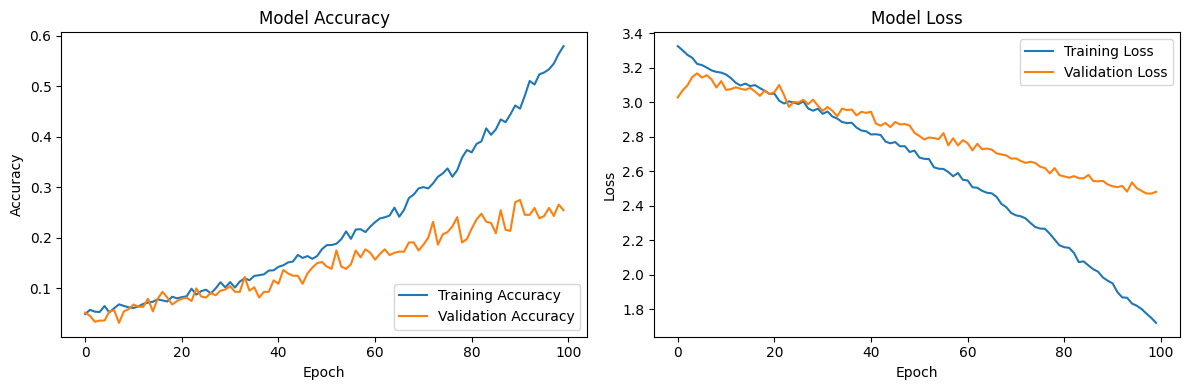

In [37]:
import matplotlib.pyplot as plt

# Memastikan bahwa history_v1.history memiliki data yang diperlukan
acc = hist_v2.history.get('accuracy', [])
test_acc = hist_v2.history.get('val_accuracy', [])
loss = hist_v2.history.get('loss', [])
test_loss = hist_v2.history.get('val_loss', [])

# Menentukan range epochs berdasarkan panjang data akurasi
epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

# Plot Training and Testing Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, test_acc, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot Training and Testing Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, test_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Mengatur layout agar rapi
plt.tight_layout()
plt.show()

In [38]:
from tensorflow.keras.models import load_model

save_model = "C:\\Users\\wawn1\\projects_skripsi\\save_models\\v4.2.9_model2.keras"
model.save(save_model)

# Load model yang telah disimpan
new_model = load_model(save_model)

# Evaluate the restored model on the test set
test_loss, test_acc = new_model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.2659 - loss: 2.4484
Test Loss: 2.41025447845459, Test Accuracy: 0.28409090638160706


In [39]:
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, average_precision_score, precision_recall_curve, cohen_kappa_score, top_k_accuracy_score
from itertools import cycle

# Prediksi menggunakan model pada data uji
y_pred = model.predict(X_test)
y_pred_probabilities = tf.nn.softmax(y_pred).numpy()  # Terapkan softmax jika belum diterapkan di model
y_pred_classes = np.argmax(y_pred_probabilities, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Hitung metrik evaluasi
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
log_loss_value = log_loss(y_true_classes, y_pred_probabilities)
accuracy = accuracy_score(y_true_classes, y_pred_classes)
kappa = cohen_kappa_score(y_true_classes, y_pred_classes)
top_k_acc = top_k_accuracy_score(y_true_classes, y_pred_probabilities, k=5)
average_precision = np.mean([average_precision_score(y_test[:, i], y_pred_probabilities[:, i]) for i in range(len(AKSARA))])

# Print metrik evaluasi
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Log Loss: {log_loss_value:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Cohen's Kappa: {kappa:.4f}")
print(f"Top-5 Accuracy: {top_k_acc:.4f}")
print(f"Mean Average Precision (mAP): {average_precision:.4f}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 49s 3s/step
Precision: 0.2808
Recall: 0.2841
F1 Score: 0.2715
Log Loss: 2.9071
Accuracy: 0.2841
Cohen's Kappa: 0.2464
Top-5 Accuracy: 0.6182
Mean Average Precision (mAP): 0.2872


              precision    recall  f1-score   support

          ba       0.08      0.06      0.06        18
          ca       0.29      0.17      0.22        23
          da       0.29      0.20      0.24        20
         dha       0.25      0.12      0.16        26
          ga       0.27      0.35      0.30        23
          ha       0.27      0.16      0.20        25
          ja       0.53      0.70      0.60        23
          ka       0.33      0.50      0.40        24
          la       0.26      0.22      0.24        27
          Ma       0.30      0.37      0.33        19
          na       0.29      0.32      0.30        19
         nga       0.30      0.46      0.36        24
         nya       0.12      0.12      0.12        17
          pa       0.04      0.08      0.05        13
          ra       0.42      0.70      0.52        23
          sa       0.33      0.22      0.27        27
          ta       0.19      0.21      0.20        19
         tha       0.38    

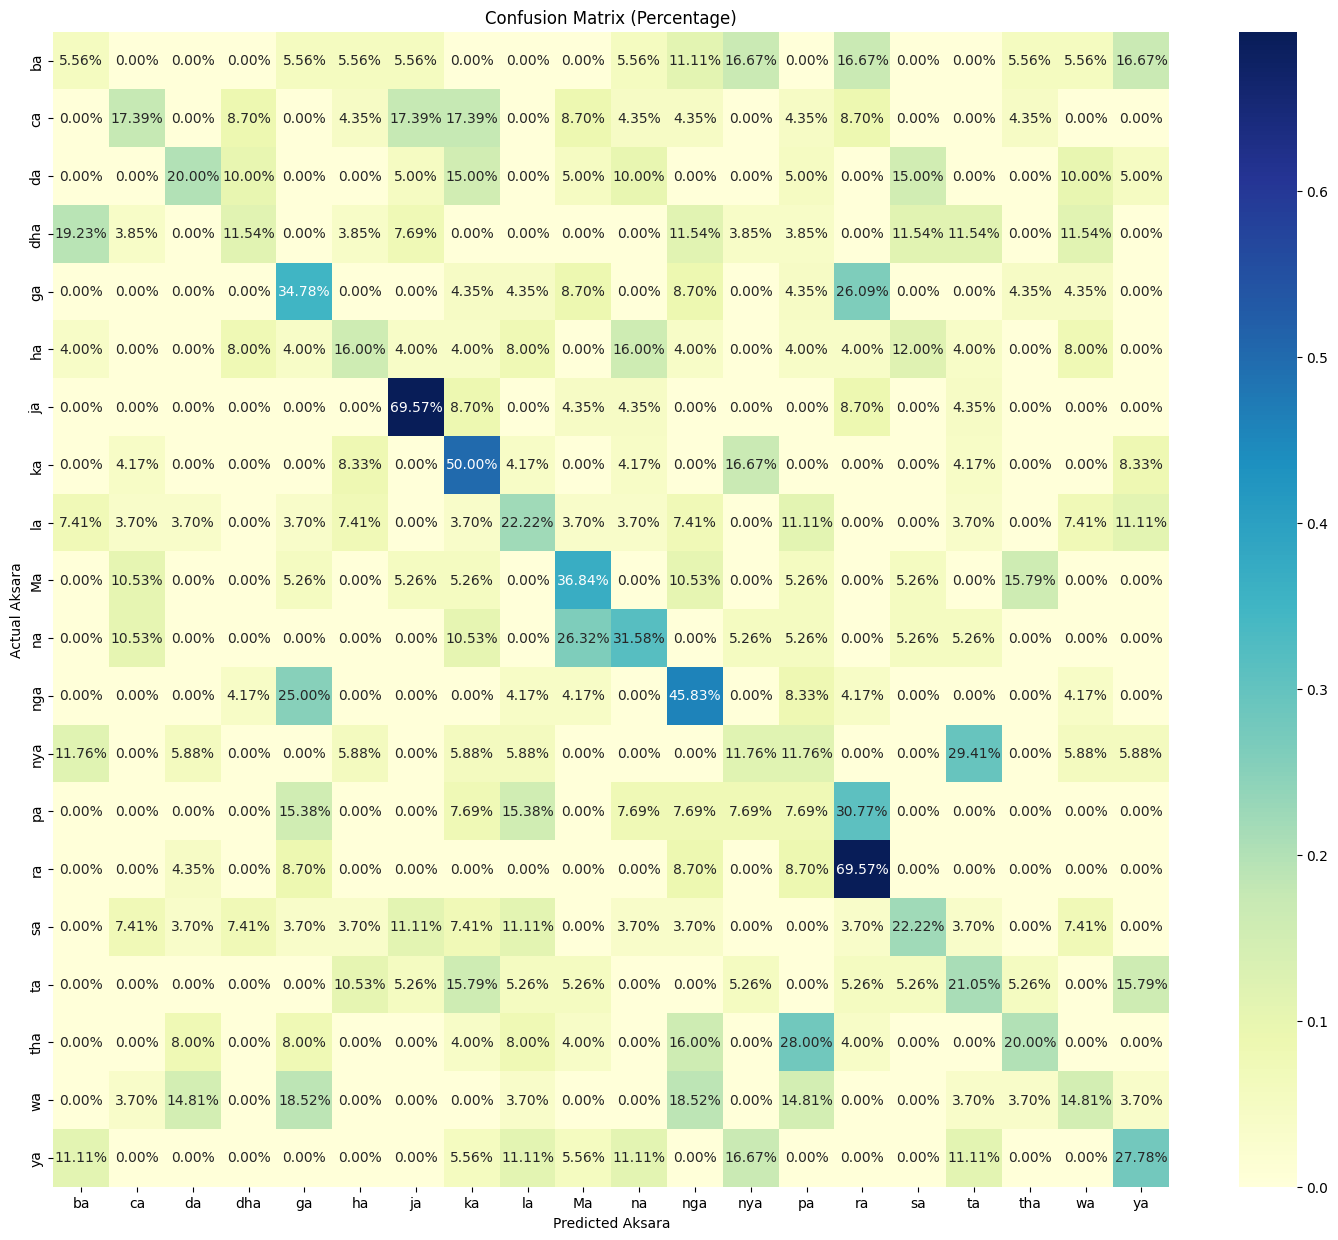

In [40]:
# Tampilkan classification report yang lengkap
report = classification_report(y_true_classes, y_pred_classes, target_names=AKSARA)
print(report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Normalisasi confusion matrix untuk mendapatkan persentase
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Tampilkan confusion matrix sebagai heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2%", cmap="YlGnBu", xticklabels=AKSARA, yticklabels=AKSARA)
plt.xlabel("Predicted Aksara")
plt.ylabel("Actual Aksara")
plt.title("Confusion Matrix (Percentage)")
plt.show()

AUC-ROC for class ba: 0.6459
AUC-ROC for class ca: 0.7400
AUC-ROC for class da: 0.7480
AUC-ROC for class dha: 0.7145
AUC-ROC for class ga: 0.8522
AUC-ROC for class ha: 0.6747
AUC-ROC for class ja: 0.9196
AUC-ROC for class ka: 0.9043
AUC-ROC for class la: 0.7383
AUC-ROC for class Ma: 0.7836
AUC-ROC for class na: 0.6610
AUC-ROC for class nga: 0.8555
AUC-ROC for class nya: 0.7758
AUC-ROC for class pa: 0.7455
AUC-ROC for class ra: 0.9654
AUC-ROC for class sa: 0.7050
AUC-ROC for class ta: 0.7716
AUC-ROC for class tha: 0.7947
AUC-ROC for class wa: 0.8290
AUC-ROC for class ya: 0.7949


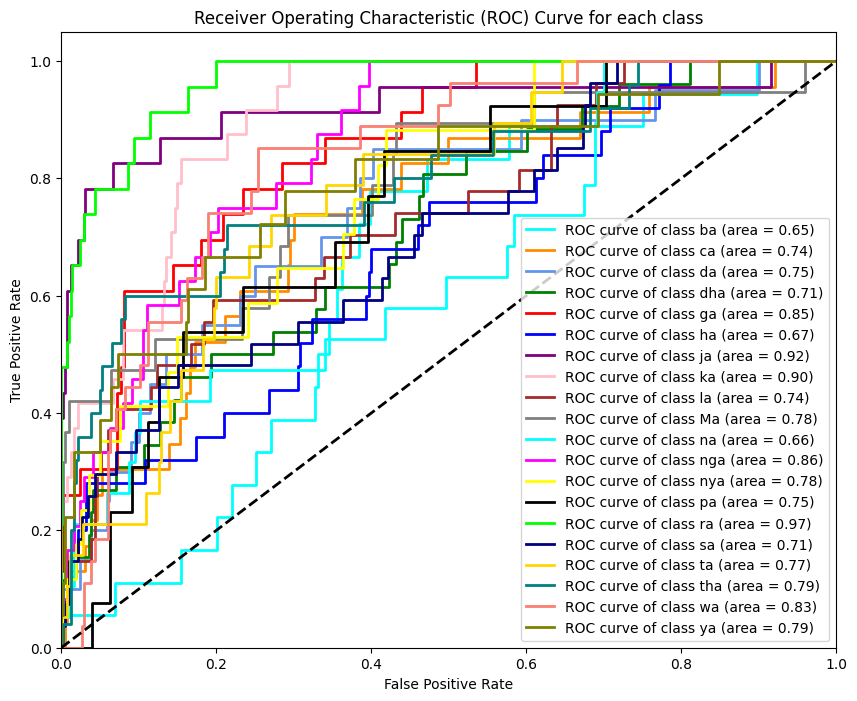

In [41]:
# Hitung AUC-ROC untuk setiap kelas
auc_roc_scores = roc_auc_score(y_test, y_pred_probabilities, average=None)
for idx, score in enumerate(auc_roc_scores):
    print(f"AUC-ROC for class {AKSARA[idx]}: {score:.4f}")

# Tampilkan ROC Curve untuk setiap kelas
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(AKSARA)
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'blue', 'purple', 'pink', 'brown', 'grey', 
                'cyan', 'magenta', 'yellow', 'black', 'lime', 'navy', 'gold', 'teal', 'salmon', 'olive'])

plt.figure(figsize=(10, 8))

for i, color in zip(range(n_classes), colors):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_probabilities[:, i])
    roc_auc[i] = roc_auc_score(y_test[:, i], y_pred_probabilities[:, i])
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve of class {AKSARA[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc="lower right")
plt.show()

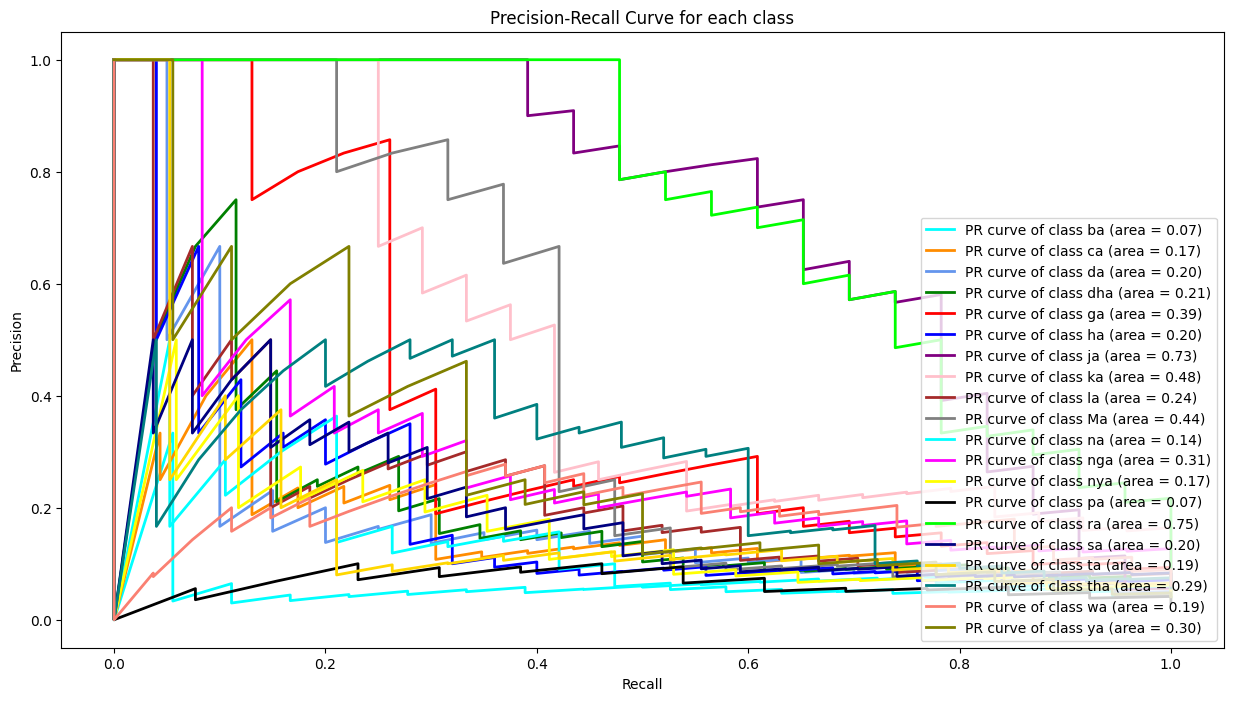

In [42]:
# Hitung AUPRC untuk setiap kelas
average_precision = dict()
precision_recall_curves = dict()

plt.figure(figsize=(15, 8))

for i, color in zip(range(n_classes), colors):
    precision_recall_curves[i], recall, _ = precision_recall_curve(y_test[:, i], y_pred_probabilities[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_pred_probabilities[:, i])
    plt.plot(recall, precision_recall_curves[i], color=color, lw=2, label=f'PR curve of class {AKSARA[i]} (area = {average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for each class')
plt.legend(loc="lower right")
plt.show()